In [1]:
import pdb
from os import listdir
from os.path import isfile, join, splitext
import numpy as np
import cv2
import pickle
import pyenf
import scipy.io.wavfile
from scipy import signal
import math
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt
import librosa
from skimage.util import img_as_float
from skimage.segmentation import slic
from scipy.stats.stats import pearsonr
import re

In [2]:
fs = 1000  # downsampling frequency
nfft = 8192
frame_size = 2  # change it to 6 for videos with large length recording
overlap = 0
window_size = 10
shift_size = 2
output_dir = "/home/pza/fakefilegencheck/"
power_signal_recording, fs = librosa.load("/home/pza/pwrinput/power_rec_nomove.wav", sr=fs)  # loading the power ENF data
file_length = len(power_signal_recording)
print(file_length)

300039


In [9]:
total_windows = math.ceil(((file_length/fs)-window_size+1)/shift_size)


In [39]:
fourth_second_cut = 4*fs
sliced_off_portion = int(.1*fs)
edited_recording = np.concatenate((power_signal_recording[0:fourth_second_cut],
                                   power_signal_recording[fourth_second_cut+sliced_off_portion-1:file_length-1]))

In [37]:
len_edited_file = len(edited_recording)
print(file_length - len_edited_file)

500


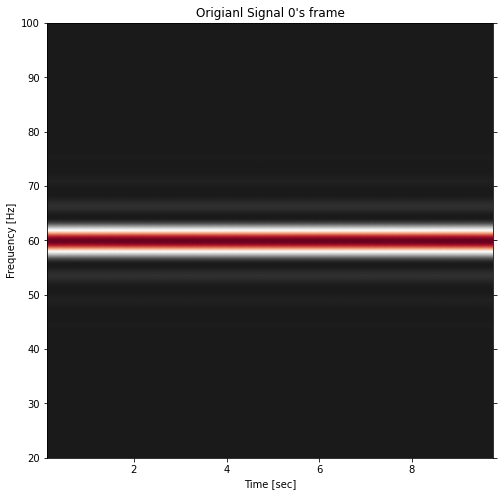

In [34]:
for i in [0]:#total_windows):
    spectrum_check = "_0_"
    window_start = i*shift_size*fs
    window_end = window_start+(window_size*fs)
    sampled_data = power_signal_recording[window_start:window_end]
    f, t, P = signal.spectrogram(sampled_data, nfft=nfft, fs=fs)
    plt.figure(figsize=(8,8),facecolor='white')
    plt.pcolormesh(t, f, P, shading='gouraud', cmap = 'RdGy_r')
    plt.ylim(20,100)
    plt.tick_params(left = True, right = True, labelleft = True ,
                        labelbottom = True, bottom = True)
    plt.title("Origianl Signal 0's frame")
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    #file_name = "/home/pza/temp/recording_"+ str(i) + ".png"
    #plt.savefig(file_name)

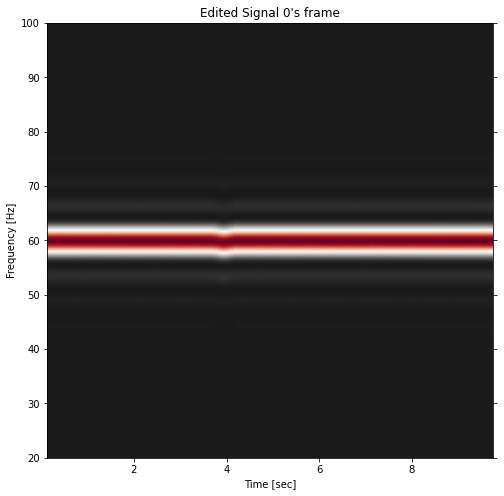

In [40]:
for i in [0]:#total_windows):
    spectrum_check = "_0_"
    window_start = i*shift_size*fs
    window_end = window_start+(window_size*fs)
    sampled_data = edited_recording[window_start:window_end]
    f, t, P = signal.spectrogram(sampled_data, nfft=nfft, fs=fs)
    plt.figure(figsize=(8,8),facecolor='white')
    plt.pcolormesh(t, f, P, shading='gouraud', cmap = 'RdGy_r')
    plt.ylim(20,100)
    plt.tick_params(left = True, right = True, labelleft = True ,
                        labelbottom = True, bottom = True)
    plt.title("Edited Signal 0's frame")
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    #file_name = "/home/pza/temp/recording_"+ str(i) + ".png"
    #plt.savefig(file_name)